<img src="https://raw.githubusercontent.com/OpenEnergyPlatform/academy/develop/docs/data/img/rlilogo.png" alt="RLI" height="75" width="75" align="right"/>

# UML - appBBB data structure

This script uses the package _iplantuml_ for plotting UML. <br>
See tutorial for installation and other instructions.

In [1]:
__copyright__ = "Reiner Lemoine Institut"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/OpenEnergyPlatform/examples/blob/master/LICENSE"
__author__    = "oakca, Ludee"

In [2]:
import iplantuml

# Contents

The following UML diagrams will be displayed in the following:
1. appBBB UML Diagrams - Actual State
2. appBBB UML Diagrams - Reworked & Normalized

## appBBB UML Diagrams - Actual State

created by using data from https://openenergyplatform.org/dataedit/view/scenario

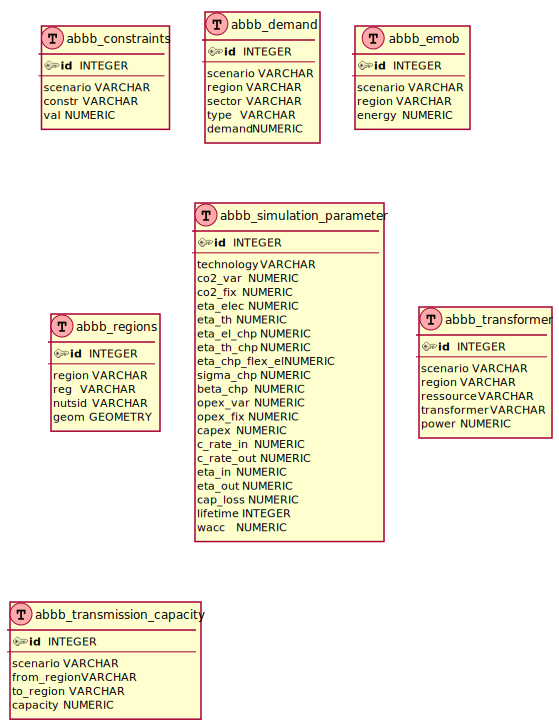

In [3]:
%%plantuml --jar

@startuml
'ERM definitions:

skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
hide methods
hide stereotypes
                                                  
Table(t1, "abbb_constraints") {
    primary_key(id) \t INTEGER
    --
    scenario \t VARCHAR
    constr \t VARCHAR
    val \t NUMERIC
}


Table(t2, "abbb_demand") {
    primary_key(id) \t INTEGER
    --
    scenario \t VARCHAR
    region \t VARCHAR
    sector \t VARCHAR
    type \t VARCHAR
    demand \t NUMERIC
}


Table(t3, "abbb_emob") {
    primary_key(id) \t INTEGER
    --
    scenario \t VARCHAR
    region \t VARCHAR
    energy \t NUMERIC
}


Table(t4, "abbb_regions") {
    primary_key(id) \t INTEGER
    --
    region \t VARCHAR
    reg \t VARCHAR
    nutsid \t VARCHAR
    geom GEOMETRY
}


Table(t5, "abbb_simulation_parameter") {
    primary_key(id) \t INTEGER
    --
    technology \t VARCHAR
    co2_var \t NUMERIC
    co2_fix \t NUMERIC
    eta_elec \t NUMERIC
    eta_th \t NUMERIC
    eta_el_chp \t NUMERIC
    eta_th_chp \t NUMERIC
    eta_chp_flex_el \t NUMERIC
    sigma_chp \t NUMERIC
    beta_chp \t NUMERIC
    opex_var \t NUMERIC
    opex_fix \t NUMERIC
    capex \t NUMERIC
    c_rate_in \t NUMERIC
    c_rate_out \t NUMERIC
    eta_in \t NUMERIC
    eta_out \t NUMERIC
    cap_loss \t NUMERIC
    lifetime \t INTEGER
    wacc \t NUMERIC
}


Table(t6, "abbb_transformer") {
    primary_key(id) \t INTEGER
    --
    scenario \t VARCHAR
    region \t VARCHAR
    ressource \t VARCHAR
    transformer \t VARCHAR
    power \t NUMERIC
}


Table(t7, "abbb_transmission_capacity") {
    primary_key(id) \t INTEGER
    --
    scenario \t VARCHAR
    from_region \t VARCHAR
    to_region \t VARCHAR
    capacity \t NUMERIC
}

                                        
@enduml
                                                  

## appBBB UML Diagrams - Reworked & Normalized

Changes:
* abbb_scenarios is created in order to link some tabels.
* abbb_simulation_parameter is normalized for databank.
* Foreign keys (scenario and region) are set.
* UML diagrams are connected.

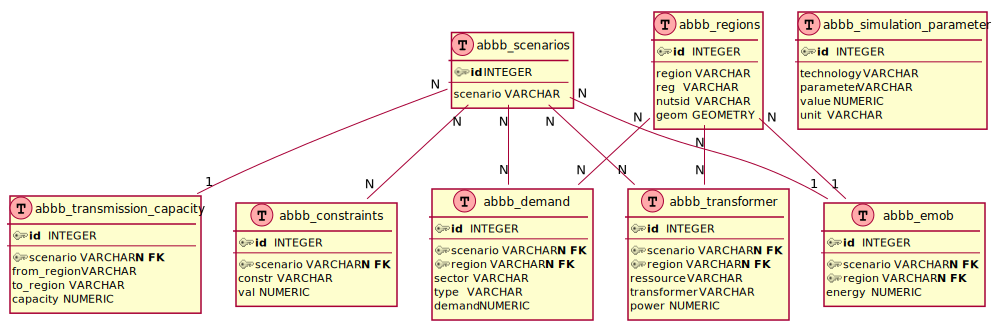

In [4]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
!define foreign <b>FK</b> 
hide methods
hide stereotypes

                                            
Table(sce, "abbb_scenarios") {
    primary_key(id) INTEGER
    --
    scenario \t VARCHAR
}
                                                  
Table(reg, "abbb_regions") {
    primary_key(id) \t INTEGER
    --
    region \t VARCHAR
    reg \t VARCHAR
    nutsid \t VARCHAR
    geom GEOMETRY
}

Table(const, "abbb_constraints") {
    primary_key(id) \t INTEGER
    --
    foreign_key(scenario) \t VARCHAR not_null foreign
    constr \t VARCHAR
    val \t NUMERIC
}

Table(tra_cap, "abbb_transmission_capacity") {
    primary_key(id) \t INTEGER
    --
    foreign_key(scenario) \t VARCHAR not_null foreign
    from_region \t VARCHAR
    to_region \t VARCHAR
    capacity \t NUMERIC
}
                                                  
Table(demand, "abbb_demand") {
    primary_key(id) \t INTEGER
    --
    foreign_key(scenario) \t VARCHAR not_null foreign
    foreign_key(region) \t VARCHAR not_null foreign
    sector \t VARCHAR
    type \t VARCHAR
    demand \t NUMERIC
}
                                                  
Table(trans, "abbb_transformer") {
    primary_key(id) \t INTEGER
    --
    foreign_key(scenario) \t VARCHAR not_null foreign
    foreign_key(region) \t VARCHAR not_null foreign
    ressource \t VARCHAR
    transformer \t VARCHAR
    power \t NUMERIC
}

Table(emob, "abbb_emob") {
    primary_key(id) \t INTEGER
    --
    foreign_key(scenario) \t VARCHAR not_null foreign
    foreign_key(region) \t VARCHAR not_null foreign
    energy \t NUMERIC
}

Table(param, "abbb_simulation_parameter") {
    primary_key(id) \t INTEGER
    --
    technology \t VARCHAR
    parameter \t VARCHAR
    value \t NUMERIC
    unit \t VARCHAR
}
                                                  
sce "N" -- "N" const
sce "N" -- "1" tra_cap
sce "N" -- "N" trans
sce "N" -- "N" demand
sce "N" -- "1" emob
reg "N" -- "N" trans
reg "N" -- "N" demand
reg "N" -- "1" emob
                                                  
@enduml